# Default on Credit Card 

## Introduction

This dataset is a machine learning respository from UCI.  Mined from six different sources to predict a binary result of classification, whether a client is credible or not.  Data includes, history of past payments, payment amount on current statement, amount of previous payment.  The goal of this studying is to improve risk management.  After working with this dataset, we should have a model that can filter through future candidates and help reduce the risk of loaning money to non credible applicants.

### Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# setting plot style
sns.set_style('whitegrid')

In [3]:
# importing excel to dataframe
df = pd.read_excel('default of credit card clients.xls',header=1)

In [4]:
# showing head
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# checking dimensions
df.shape

(30000, 25)

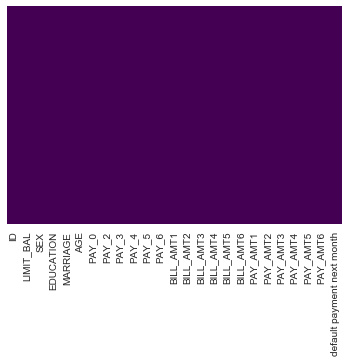

In [6]:
# Looking for null values
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.show()

In [7]:
# inspecting data
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


After using describe we can see that there are a lot of very high and low values that are very far from the 75% and 25% values. To improve model preformance, we are going to remove these extreme values and place the others into a temperary dataframe

## Data Cleaning

In [4]:
# Removing outliers
tdf = df[df['PAY_AMT1'] < 15000]

In [5]:
# Removing outliers
tdf = tdf[tdf['PAY_AMT2'] < 15000]

In [6]:
# Removing outliers
tdf = tdf[tdf['PAY_AMT3'] < 15000]

In [7]:
# Removing outliers
tdf = tdf[tdf['PAY_AMT4'] < 15000]

In [8]:
 # Removing outliers
tdf = tdf[tdf['PAY_AMT5'] < 15000]

In [9]:
# Removing outliers
tdf = tdf[tdf['BILL_AMT1'] < 300000]

In [10]:
# Removing outliers
tdf = tdf[tdf['BILL_AMT2'] < 300000]

In [11]:
# Removing outliers
tdf = tdf[tdf['BILL_AMT3'] < 300000]

In [12]:
# Removing outliers
tdf = tdf[tdf['BILL_AMT4'] < 300000]

In [13]:
# Removing outliers
tdf = tdf[tdf['BILL_AMT5'] < 300000]

After testing a few models, I found that the negative values in the PAY categories are causing problems.

In [14]:
# Removing negative values
tdf = tdf[tdf['PAY_0'] >= 0]

In [15]:
# Removing negative values
tdf = tdf[tdf['PAY_2'] >= 0]

In [16]:
# Removing negative values
tdf = tdf[tdf['PAY_3'] >= 0]

In [17]:
# Removing negative values
tdf = tdf[tdf['PAY_4'] >= 0]

In [18]:
# Removing negative values
tdf = tdf[tdf['PAY_5'] >= 0]

In [19]:
# Removing negative values
tdf = tdf[tdf['PAY_6'] >= 0]

In [20]:
# checking temporary data's information
tdf.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,14138.000000,14138.000000,14138.000000,14138.000000,14138.000000,14138.000000,14138.000000,14138.000000,14138.000000,14138.000000,...,14138.000000,14138.000000,14138.000000,14138.000000,14138.000000,14138.000000,14138.000000,14138.000000,14138.000000,14138.000000
mean,14984.368227,120136.652992,1.586434,1.968242,1.571368,35.019380,0.507002,0.511105,0.479205,0.439312,...,56807.272174,53064.854718,50839.213892,3239.243952,3126.598246,2691.370915,2466.170463,2457.913142,3478.646626,0.269628
std,8554.787059,103491.692325,0.492490,0.750126,0.523379,9.606514,0.928581,0.972740,0.966891,0.970034,...,51468.407781,49096.174471,48680.576809,2620.277641,2555.129577,2400.850236,2357.052639,2382.720140,10685.421707,0.443782
min,3.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-23670.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7604.750000,50000.000000,1.000000,1.000000,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,...,19467.250000,18811.250000,17822.000000,1509.000000,1500.000000,1020.250000,900.000000,848.250000,722.250000,0.000000
50%,15204.000000,80000.000000,2.000000,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,...,38874.000000,33523.000000,30896.500000,2482.500000,2247.000000,2000.000000,1872.000000,1900.000000,1831.500000,0.000000
75%,22068.000000,170000.000000,2.000000,2.000000,2.000000,41.000000,1.000000,0.000000,0.000000,0.000000,...,78482.000000,73356.000000,70801.250000,4500.000000,4224.500000,3776.000000,3500.000000,3466.750000,3500.000000,1.000000
max,30000.000000,720000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,...,293969.000000,298492.000000,299317.000000,14813.000000,14955.000000,14955.000000,14850.000000,14500.000000,280000.000000,1.000000


In this describe we can see that there are still some large negative values that are skewing the data

In [20]:
# Removing negative values
tdf = tdf[tdf['BILL_AMT1'] >= 0]

In [21]:
# Removing negative values
tdf = tdf[tdf['BILL_AMT2'] >= 0]

In [22]:
# Removing negative values
tdf = tdf[tdf['BILL_AMT3'] >= 0]

In [23]:
# Removing negative values
tdf = tdf[tdf['BILL_AMT4'] >= 0]

In [24]:
# Removing negative values
tdf = tdf[tdf['BILL_AMT5'] >= 0]

In [25]:
# Removing negative values
tdf = tdf[tdf['BILL_AMT6'] >= 0]

## Selecting Features for Model

In [26]:
# setting up a dataframe for model's features
features = pd.DataFrame()

In [27]:
# taking the data from the tdf
features = tdf.drop(tdf[['ID','SEX','MARRIAGE']],axis=1)

In [28]:
# creating a sex variable, 0 or 1
features['sex'] = np.where(tdf['SEX'] == 2, 1, 0)

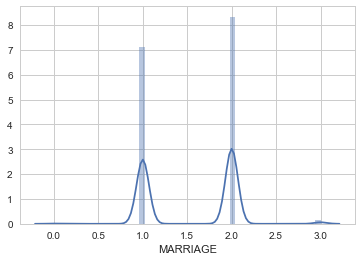

In [79]:
sns.distplot(df.MARRIAGE)

In [20]:
# checking all the values for marriage
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [29]:
# creating a 0 , 1 variable for marrage
features['marriage'] = np.where(tdf.MARRIAGE > 1, 1, 0)

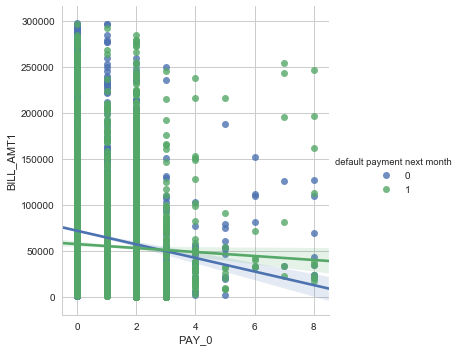

In [82]:
sns.lmplot('PAY_0','BILL_AMT1',data=features, hue='default payment next month')

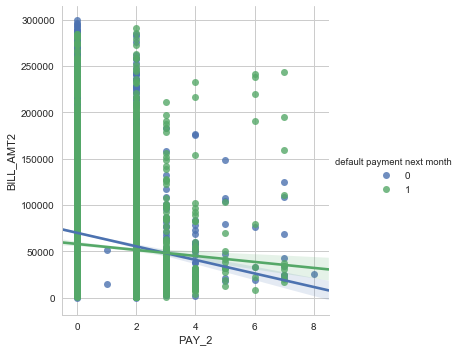

In [83]:
sns.lmplot('PAY_2','BILL_AMT2',data=features, hue='default payment next month')

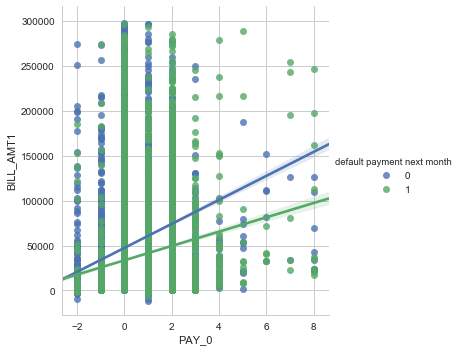

In [48]:
sns.lmplot('PAY_0','BILL_AMT1',data=features, hue='default payment next month')

In [30]:
# adding feature
features['total_pay'] = np.where(features['PAY_0'] + features['PAY_2'] + features['PAY_3'] + features['PAY_4'] + features['PAY_5'] + features['PAY_6'] >= 1, 1, 0) 

In [31]:
# adding feature
features['avg_pay'] = (features['PAY_0'] + features['PAY_2'] + features['PAY_3'] + features['PAY_4'] + features['PAY_5'] + features['PAY_6'])/6

In [32]:
# adding feature
features['avg_bill'] = (features['BILL_AMT1'] + features['BILL_AMT2'] + features['BILL_AMT3'] + features['BILL_AMT4'] + features['BILL_AMT5']+ features['BILL_AMT6'])/6

In [33]:
# adding feature
features['avg_pay_amt'] = (features['PAY_AMT1'] + features['PAY_AMT2'] + features['PAY_AMT3'] + features['PAY_AMT4'] + features['PAY_AMT5']+ features['PAY_AMT6'])/6

In [34]:
# adding feature
features['pay_log'] = np.log(np.absolute(.01 + features.PAY_0))

In [35]:
# adding feature
features['pay_log2'] = np.log(np.absolute(.01 + features.PAY_2))

In [36]:
# adding feature
features['pay_log3'] = np.log(np.absolute(.01 + features.PAY_3))

In [37]:
# adding feature
features['pay_log4'] = np.log(np.absolute(.01 + features.PAY_4))

In [38]:
# adding feature
features['pay_log5'] = np.log(np.absolute(.01 + features.PAY_5))

In [39]:
# adding feature
features['pay_log6'] = np.log(np.absolute(.01 + features.PAY_6))

In [40]:
# adding feature
features['avg_pay_log'] = (features['pay_log'] + features['pay_log2'] + features['pay_log3'] + features['pay_log4'] + features['pay_log5']+ features['pay_log6'])/6

In [45]:
features.shape

(14093, 35)

In [46]:
features.columns

Index(['LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month', 'sex',
       'marriage', 'total_pay', 'avg_pay', 'avg_bill', 'avg_pay_amt',
       'pay_log', 'pay_log2', 'pay_log3', 'pay_log4', 'pay_log5', 'pay_log6',
       'avg_pay_log'],
      dtype='object')

In [41]:
# adding feature
features_test = features[['total_pay','avg_pay','avg_pay_log','pay_log','avg_bill','avg_pay_amt','default payment next month']]

## Resampling the Data

In [48]:
# checking target values
features['default payment next month'].value_counts()

0    10289
1     3804
Name: default payment next month, dtype: int64

In [42]:
# importing lib
from sklearn.utils import resample

In [43]:
# Separate majority and minority classes
feat_majority = features_test[features_test['default payment next month']==0]
feat_minority = features_test[features_test['default payment next month']==1]

In [44]:
# Upsample minority class
feat_majority_downsampled = resample(feat_majority,
                                   replace=False,
                                   n_samples=3804)

In [45]:
# Combine majority class with upsampled minority class
feat_downsampled = pd.concat([feat_minority, feat_majority_downsampled])

In [46]:
# Display new class counts
feat_downsampled['default payment next month'].value_counts()

1    3804
0    3804
Name: default payment next month, dtype: int64

## Logistic Regression

In [47]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_predict
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [55]:
# setting up logistic regression model
lr = LogisticRegression()

In [52]:
# Separate input features (X) and target variable (y)
y = feat_downsampled['default payment next month']
X = feat_downsampled.drop(feat_downsampled[['default payment next month']], axis=1)


# splitting data into test and training group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [57]:
# Train model
lrc = LogisticRegression().fit(X_train, y_train)
 
# Predict on training set
cross_val_score(lrc, X_test, y_test, cv=8)

array([ 0.77460317,  0.73650794,  0.75477707,  0.75159236,  0.74840764,
        0.76357827,  0.74440895,  0.73482428])

In [58]:
y_pred = lrc.predict(X_test)

In [59]:
print(confusion_matrix(y_test, y_pred))
'\n'
print(classification_report(y_test, y_pred))

[[1046  188]
 [ 437  840]]
             precision    recall  f1-score   support

          0       0.71      0.85      0.77      1234
          1       0.82      0.66      0.73      1277

avg / total       0.76      0.75      0.75      2511



After removing the datasets outliers and negative values.  The regression model has been improved to about 76% accuracy.  It is also good that the train model and the test model have the same values this means the model isn't overfitting, but it is a little unstable.  This can be corrected with pca and k-best.

## K-Select Best

Find the ranking of importants for each features

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [54]:
# setting up K-best to see P-Values
kbest = SelectKBest(k='all').fit(X_train,y_train)

In [55]:
# Putting results in a Dataframe
result_kb = pd.DataFrame(kbest.score_func(X_train,y_train)[1],index=X.columns)

In [56]:
# printing the P-Values for features
result_kb[0].sort_values()

pay_log         0.000000e+00
total_pay      4.115619e-304
avg_pay_log    1.186577e-285
avg_pay        9.203120e-227
avg_pay_amt     1.588521e-24
avg_bill        3.224596e-17
Name: 0, dtype: float64

In [64]:
result_kb[0].sort_values().index

Index(['pay_log', 'total_pay', 'avg_pay_log', 'avg_pay', 'avg_pay_amt',
       'avg_bill'],
      dtype='object')

In [57]:
k_best = X_train[['pay_log', 'total_pay', 'avg_pay']]

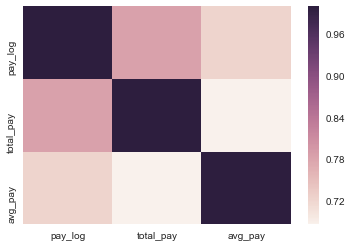

In [66]:
sns.heatmap(k_best.corr())

## Applying PCA

In [58]:
# standardizing data
scaled = StandardScaler().fit_transform(X_train)

In [59]:
# using pca to select 50 components from our 2400 features
sklearn_pca = PCA(n_components=1)

# fitting our x training data to pca
Y_sklearn = sklearn_pca.fit_transform(scaled)

# adding results to a new data frame
X_PCA = pd.DataFrame(Y_sklearn)

## Testing K-Best and PCA on Regression Model

In [69]:
# Train model
lrc = LogisticRegression().fit(k_best, y_train)
 
# Predict on training set
cross_val_score(lrc, X_test, y_test, cv= 5)

array([ 0.74950298,  0.7554672 ,  0.75298805,  0.75099602,  0.74451098])

In [70]:
y_pred = lrc.predict(k_best)

In [71]:
# Train model
lrc = LogisticRegression().fit(X_PCA, y_train)
 
# Predict on training set
cross_val_score(lrc, X_test, y_test, cv= 5)

array([ 0.74950298,  0.7554672 ,  0.75298805,  0.75099602,  0.74451098])

### Regression Analysis

After applying Pca and K-best, we have been able to reduce the amount of data.  While improving the consistency of the model.  This model handles this type of dataset very well, because it counts the number of time a feature causes the target outcome. Then uses the probability of the features to classify the data.

## Random Forest Model

### Importing Libraries

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.grid_search import GridSearchCV

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [92]:
# setting up random forest model
rfc = RandomForestClassifier()

In [259]:
# creating parameters to test
param_grid = {'n_estimators':[10,100,200],
             'min_samples_split':[2,50,100,250,500],
              'min_samples_leaf':[3,10,50,100]}

In [260]:
# fitting grid with setting
grid = GridSearchCV(rfc,param_grid,verbose=3)

In [262]:
# best parameter
grid.best_params_

{'min_samples_leaf': 100, 'min_samples_split': 250, 'n_estimators': 10}

In [73]:
# setting up random forest model
rfc = RandomForestClassifier(min_samples_leaf=100, min_samples_split=250, n_estimators=10)

In [76]:
# testing model over 5 folds
cross_val_score(rfc.fit(X_train, y_train), X_test,y_test, cv=5)

array([ 0.71570577,  0.73956262,  0.75099602,  0.75498008,  0.7744511 ])

## Random Forest K-Best

In [77]:
# applying new parameter
rfc_kbest = RandomForestClassifier(min_samples_leaf=3, min_samples_split=500, n_estimators=10)

In [78]:
# testing model over 5 folds
cross_val_score(rfc_kbest.fit(k_best, y_train), X_test,y_test, cv=5)

array([ 0.71570577,  0.73956262,  0.75896414,  0.75896414,  0.76646707])

## Random Forest PCA

In [80]:
# applying new parameter
rfc_pca = RandomForestClassifier(min_samples_leaf=10, min_samples_split=500, n_estimators=10)

In [81]:
# testing model over 5 folds
cross_val_score(rfc_pca.fit(X_PCA, y_train), X_test,y_test, cv=5)

array([ 0.71570577,  0.73956262,  0.75298805,  0.74103586,  0.76646707])

### Analysis for Random Forest Models

After running a random forest model with the original data.  We could see that the model was overfitting. But, by applying PCA and K-Best to reduce the number of dimensions.  The model is able to improve its accuracy and consistency. The random forest model is good for this type of data because it has multiple conditions that can be classified to gain information and help calculate the probability of a certain outcome.  Once the data is broken down and classified the model receives feed back from each tree. Helping it predict the target variable.

## Gradient Boosting

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [102]:
clf = GradientBoostingClassifier()

In [275]:
# setting up params to test C value and gamma value for best fit
param_grid = {'n_estimators':[175], # know 175 is a good value from previous model testing
          'subsample': [0.35, 0.5, 0.65, 0.75, 0.85, 1],
          'max_depth': [2],
          'loss': ['deviance', 'exponential'],
         'learning_rate':[0.35, 0.5, 0.65, 0.75, 0.85, 1]}

In [276]:
# setting grid search with model and params to test
grid = GridSearchCV(clf,param_grid,verbose=3)

In [278]:
grid.best_params_

{'learning_rate': 0.35,
 'loss': 'exponential',
 'max_depth': 2,
 'n_estimators': 175,
 'subsample': 0.85}

In [83]:
clf = GradientBoostingClassifier(learning_rate= 0.35, loss='exponential', max_depth=2, n_estimators=175, subsample=.85)

In [84]:
# testing model over 5 folds
cross_val_score(clf.fit(X_train, y_train), X_test,y_test, cv=5)

array([ 0.72365805,  0.72166998,  0.7250996 ,  0.72709163,  0.74251497])

## Gradient Boosting With K-Best

In [282]:
grid.best_params_

{'learning_rate': 0.5,
 'loss': 'exponential',
 'max_depth': 2,
 'n_estimators': 175,
 'subsample': 0.35}

In [85]:
clf_kbest = GradientBoostingClassifier(learning_rate= 0.5, loss='exponential', max_depth=2, n_estimators=175, subsample=.35)

In [86]:
# testing model over 5 folds
cross_val_score(clf_kbest.fit(k_best, y_train), X_test,y_test, cv=5)

array([ 0.72763419,  0.70974155,  0.71912351,  0.69920319,  0.71057884])

## Gradient Boosting With PCA

In [286]:
grid.best_params_

{'learning_rate': 0.35,
 'loss': 'exponential',
 'max_depth': 2,
 'n_estimators': 175,
 'subsample': 1}

In [87]:
clf_pca = GradientBoostingClassifier(learning_rate= 0.35, loss='exponential', max_depth=2, n_estimators=175, subsample=1)

In [88]:
# testing model over 5 folds
cross_val_score(clf_pca.fit(X_PCA, y_train), X_test,y_test, cv=5)

array([ 0.72962227,  0.73161034,  0.74701195,  0.73705179,  0.75848303])

### Gradient Boosting Analysis

The gradient boosting model is a lot like the random forest model above.  Making it a solid choice for this data, However, the GBA model uses the residuals of the previous trees as a starting point to try and 'learn' from its mistakes.  Then once it reaches a stopping point, it added all the weighted outcomes together to determine an answer.  This type of model tends to take longer to run than a random forest model but can help improve accuarcy and avoid overfitting.

## KNN Model

In [89]:
from sklearn import neighbors

In [290]:
knn = neighbors.KNeighborsClassifier()

In [291]:
param_grid = {'n_neighbors':[1,3,5,10,15,20,25,30,40,50,75,100],
              'weights':['uniform','distance']}

In [292]:
# setting grid search with model and params to test
grid = GridSearchCV(knn,param_grid,verbose=3)

In [294]:
grid.best_params_

{'n_neighbors': 100, 'weights': 'uniform'}

In [90]:
knn = neighbors.KNeighborsClassifier(n_neighbors=100, weights='uniform')

In [91]:
# testing model over 5 folds
cross_val_score(knn.fit(X_train, y_train), X_test,y_test, cv=5)

array([ 0.57852883,  0.59244533,  0.55577689,  0.58366534,  0.56686627])

## KNN K-Best

In [298]:
grid.best_params_

{'n_neighbors': 40, 'weights': 'uniform'}

In [115]:
knn_kbest = neighbors.KNeighborsClassifier(n_neighbors=40, weights='uniform')

In [116]:
# testing model over 5 folds
cross_val_score(knn_kbest.fit(k_best, y_train), X_test,y_test, cv=5)

array([ 0.54274354,  0.51292247,  0.52485089,  0.57085828,  0.58283433])

## KNN PCA

In [302]:
grid.best_params_

{'n_neighbors': 75, 'weights': 'uniform'}

In [92]:
knn_pca = neighbors.KNeighborsClassifier(n_neighbors=75, weights='uniform')

In [93]:
# testing model over 5 folds
cross_val_score(knn_pca.fit(X_PCA, y_train), X_test,y_test, cv=5)

array([ 0.5805169 ,  0.58648111,  0.54780876,  0.53585657,  0.55888224])

### KNN Analysis

The KNN models weren't not a very good fit for this dataset. I think this is do to the type of categories.  First the data isn't normalized so it is hard for a model that uses distances to be very accurate.  Also, the variables have a very small range. For example, the past payment history is a numerical value between 0 and 8. Which means most of the answers are going to be cluster close together even though they have different target outcomes.

## SVM

In [94]:
# Getting two more libs
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

In [95]:
svc = SVC()

In [96]:
# standardizing data
X_Scaled = StandardScaler().fit_transform(X_train)

In [308]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [309]:
# setting grid search with model and params to test
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [311]:
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [97]:
svc = SVC(C=10, gamma=0.0001)

In [98]:
# testing model over 5 folds
cross_val_score(svc.fit(X_Scaled, y_train), X_test,y_test, cv=5)

array([ 0.55069583,  0.51689861,  0.5       ,  0.52988048,  0.52694611])

## SVC With K-Best

In [99]:
# standardizing data
K_scaled = StandardScaler().fit_transform(k_best)

In [314]:
grid.best_params_

{'C': 0.1, 'gamma': 1}

In [100]:
svc_kbest = SVC(C=.1, gamma=1)

In [101]:
# testing model over 5 folds
cross_val_score(svc_kbest.fit(K_scaled, y_train), X_test,y_test, cv=5)

array([ 0.50894632,  0.50894632,  0.50796813,  0.50796813,  0.50898204])

## SVC With PCA

In [324]:
grid.best_params_

{'C': 100, 'gamma': 0.0001}

In [102]:
svc_pca = SVC(C=100, gamma=0.0001)

In [103]:
# testing model over 5 folds
cross_val_score(svc_pca.fit(X_PCA, y_train), X_test,y_test, cv=5)

array([ 0.54870775,  0.51888668,  0.50398406,  0.52589641,  0.52694611])

After using support vector models on the data we can see that it isn't the best model for this type of data.  Like KNN, support vectors rely heavily on distance.  It uses distance to calculate a boundary that groups each observation. Using points on the edge of clusters to separate and classify the target variable.  We can tell from the KNN models and the SVC model that these data points aren't easy to separate with a line/hyperplane/distance.  Once again, I think this is do to the range of variables, the range makes them hard to normilize.  Which is why our SVC model has about the same accuracy as the KNN models above.  Another down side to support vector machines is that they are very computation heavy, and take a very long time to run without the proper computing power.  Overall, I think they are the worst type of model for this type of data.

## MLP Classifier

In [63]:
from sklearn.neural_network import MLPClassifier
from sklearn.grid_search import GridSearchCV

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [74]:
param_grid = {'hidden_layer_sizes':[(100,2),(250,),(100,4),(200,2),(1000,),(2500,),(1000,3)],'learning_rate':['constant','invscaling','adaptive']}

In [75]:
grid = GridSearchCV(MLPClassifier(),param_grid,verbose=3)

In [77]:
grid.best_params_

{'hidden_layer_sizes': (2500,), 'learning_rate': 'invscaling'}

In [78]:
mlp = MLPClassifier(hidden_layer_sizes=(2500,), learning_rate='invscaling')

In [79]:
cross_val_score(mlp.fit(X_train, y_train), X_test,y_test, cv=5)

array([ 0.51093439,  0.50099404,  0.49800797,  0.51195219,  0.51497006])

## MLP With K-Best

In [81]:
grid.best_params_

{'hidden_layer_sizes': (250,), 'learning_rate': 'constant'}

In [84]:
mlp_kbest = MLPClassifier(hidden_layer_sizes=(250,), learning_rate='constant')

In [85]:
cross_val_score(mlp_kbest.fit(k_best, y_train), X_test,y_test, cv=5)

array([ 0.50099404,  0.49900596,  0.50398406,  0.50796813,  0.500998  ])

## MLP With PCA

In [83]:
grid.best_params_

{'hidden_layer_sizes': (2500,), 'learning_rate': 'constant'}

In [86]:
mlp_pca = MLPClassifier(hidden_layer_sizes=(2500,), learning_rate='constant')

In [87]:
cross_val_score(mlp_pca.fit(X_PCA, y_train), X_test,y_test, cv=5)

array([ 0.50099404,  0.51093439,  0.50996016,  0.51195219,  0.499002  ])

# Analysis for 'Make Your Network'




First, this is not a good dataset for this type of model. There are only 6000 datapoints in this set and that is not nearly enough to affectively train this type of model.  So, on this dataset a random forest model/ gradient boosting model is much more accurate. Plus, do to the size of the dataset neither model takes very long to run, under 10s for each. Normally a MLP would take quiet a bit longer than a random forest model. In this example even adding 10000 plus layers still don't take too long to compute.  Also it's no surprise that the MLP models accuracy is very similar to the SVM's accuracy. However, the MLP model is much faster, since the svm still take a lot of time and power to compute.

# Conclusion

After diving into this dataset, it was clear to me that the history of past payments categories were the most influencal in predicting whether a credit card holder would default on their next payment.  Knowing that, I could then plot the data with seaborn and see that the data would not easily be clustered.  Since it wasn't clustered and hard to normilize. I should focus on improving preformance of models that us other formulas. Like a regression or a random forest model.  After working with this dataset, I would use the random forest model to screen new applicants before approving them for the credit card.  The reason I would choose the random forest model is because it is the most accurate and it doesn’t really matter that it is a black box.  Knowing the specific reason they are classified as ‘not credible’ isn't really important.  The most important thing is the efficiency and accuracy. 